In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import datetime as dt
from datetime import datetime
from flask import Flask, jsonify
from matplotlib import ticker

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
# Create engine using the 'hawaii.sqlite' database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Display the Measurement row's columns and data in dictionary format
first_row1 = session.query(Measurement).first()
first_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x150a1ccdee0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
# Display the Station row's columns and data in dictionary format
first_row2 = session.query(Station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x150a1ce88e0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [13]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
# Use Inspector to print the column names and types of Measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Use Inspector to print the column names and types of Station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the precipitation data for all years
results_all_years = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date).all()
results_all_years

[('2010-01-01', 0.08),
 ('2010-01-01', 0.28),
 ('2010-01-01', 0.21),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.05),
 ('2010-01-01', 0.14),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.02),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.02),
 ('2010-01-05', 0.01),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-06', 0.02),
 ('2010-01-06', 0.11),
 ('2010-01-06', 0.01),
 ('2010-01-06', 0.08),
 ('2010-01-06', 0.36),
 ('2010-01-07', 0.06),
 ('2010-01-07', 0.38),
 ('2010-01-07', None),
 ('2010-01-07', 0.7),
 ('2010-01-0

In [17]:
# Design a query to retrieve the tobs data for the last year for the most active station
results_tobs = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date>='2016-08-23').\
filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date).all()
results_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [18]:
#get number of readings
len(results_all_years)

19550

In [19]:
# Perform a query to retrieve the precipitation data in the last one year
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>='2016-08-23').\
    order_by(Measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [20]:
#Get unique dates from last one year
results_unique_dates = session.query(Measurement.date).group_by(Measurement.date).\
filter(Measurement.date>='2016-08-23').\
    order_by(Measurement.date).all()
results_unique_dates

[('2016-08-23'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10'),
 ('2016-09-11'),
 ('2016-09-12'),
 ('2016-09-13'),
 ('2016-09-14'),
 ('2016-09-15'),
 ('2016-09-16'),
 ('2016-09-17'),
 ('2016-09-18'),
 ('2016-09-19'),
 ('2016-09-20'),
 ('2016-09-21'),
 ('2016-09-22'),
 ('2016-09-23'),
 ('2016-09-24'),
 ('2016-09-25'),
 ('2016-09-26'),
 ('2016-09-27'),
 ('2016-09-28'),
 ('2016-09-29'),
 ('2016-09-30'),
 ('2016-10-01'),
 ('2016-10-02'),
 ('2016-10-03'),
 ('2016-10-04'),
 ('2016-10-05'),
 ('2016-10-06'),
 ('2016-10-07'),
 ('2016-10-08'),
 ('2016-10-09'),
 ('2016-10-10'),
 ('2016-10-11'),
 ('2016-10-12'),
 ('2016-10-13'),
 ('2016-10-14'),
 ('2016-10-15'),
 ('2016-10-16'),
 ('2016-10-17'),
 ('2016-10-18'),
 ('2016-10-19'),
 ('2016-10-20'

In [21]:
# Get len of dates from last one year
len(results_unique_dates)

366

In [22]:
# Calculate the date 1 year ago from the last data point in the database
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Year ago date : ", year_ago_date)

Year ago date :  2016-08-23


In [23]:
# Perform a query to retrieve the data and precipitation data in the last one year
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>='2016-08-23').\
    order_by(Measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [24]:
#Get all station numbers 
results2 = session.query(Station.station, Station.name).\
    order_by(Station.station).all()
results2

[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')]

In [25]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results[:], columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df=df.dropna()
df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [26]:
# Sort the dataframe by date
df.sort_values(by=['date'])
df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [27]:
date_list1=pd.Series(['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10'])
date_list1

0    2016-08-23
1    2016-10-01
2    2016-11-09
3    2016-12-19
4    2017-01-28
5    2017-03-09
6    2017-04-18
7    2017-05-31
8    2017-07-10
dtype: object

In [28]:
date_list2=pd.to_datetime(date_list1)
date_list2

0   2016-08-23
1   2016-10-01
2   2016-11-09
3   2016-12-19
4   2017-01-28
5   2017-03-09
6   2017-04-18
7   2017-05-31
8   2017-07-10
dtype: datetime64[ns]

<Figure size 432x288 with 0 Axes>

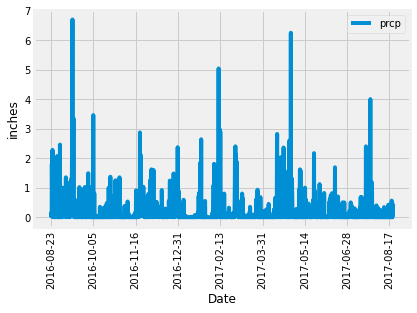

<Figure size 432x288 with 0 Axes>

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
# Set x axis to numerical value for date
plt.figure();
df_plot=df.plot(rot='vertical')
df_plot.set_ylabel("inches")
df_plot.set_xlabel("Date")
plt.show()
plt.savefig('precipitation.png')

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Design a query to show how many stations are available in this dataset?
unique_stations = session.query(Station).group_by(Station.station).count()
print(f'There are {unique_stations} unique stations available in this dataset')

There are 9 unique stations available in this dataset


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import func
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Most active station   
print(f'The most active station is USC00519281 ')

The most active station is USC00519281 


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#for this station and plot the results as a histogram

In [35]:
# Query the last 12 months of temperature observation data for each station 
results3 = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.date>='2016-08-23').\
    order_by(Measurement.station).all()
results3

[('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 77.0),
 ('USC00513117', 78.0),
 ('USC00513117', 73.0),
 ('USC00513117', 73.0),
 ('USC00513117', 78.0),
 ('USC00513117', 76.0),
 ('USC00513117', 77.0),
 ('USC00513117', 79.0),
 ('USC00513117', 78.0),
 ('USC00513117', 77.0),
 ('USC00513117', 75.0),
 ('USC00513117', 78.0),
 ('USC00513117', 74.0),
 ('USC00513117', 75.0),
 ('USC00513117', 77.0),
 ('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 76.0),
 ('USC00513117', 78.0),
 ('USC00513117', 78.0),
 ('USC00513117', 78.0),
 ('USC00513117', 78.0),
 ('USC00513117', 75.0),
 ('USC00513117', 78.0),
 ('USC00513117', 76.0),
 ('USC00513117', 77.0),
 ('USC00513117', 76.0),
 ('USC00513117', 79.0),
 ('USC00513117', 77.0),
 ('USC00513117', 77.0),
 ('USC00513117', 77.0),
 ('USC00513117', 77.0),
 ('USC00513117', 76.0),
 ('USC00513117', 77.0),
 ('USC00513117', 75.0),
 ('USC00513117', 77.0),
 ('USC00513117',

In [36]:
#Filter by the station with the highest number of observations(USC00519281) on or after 2016-08-23
results4=session.query(Measurement.station, Measurement.tobs).filter(Measurement.date>='2016-08-23',Measurement.station  == 'USC00519281').all()
results4

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [37]:
#Check the number of temperature readings for USC00519281   
len(results4)

352

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded
results6=session.query(Measurement.station, func.min(Measurement.tobs),Measurement.date).filter(Measurement.station  == 'USC00519281').all()
results6

[('USC00519281', 54.0, '2013-01-16')]

In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded in the last one year
results7=session.query(Measurement.station, func.min(Measurement.tobs),Measurement.date).filter(Measurement.station  == 'USC00519281',Measurement.date>='2016-08-23').all()
results7

[('USC00519281', 59.0, '2017-02-02')]

In [40]:
# Using the station id from the previous query, calculate the highest temperature recorded
results8=session.query(Measurement.station, func.max(Measurement.tobs),Measurement.date).filter(Measurement.station  == 'USC00519281').all()
results8

[('USC00519281', 85.0, '2015-09-10')]

In [41]:
# Using the station id from the previous query, calculate the highest temperature recorded in the last one year
results9=session.query(Measurement.station, func.max(Measurement.tobs),Measurement.date).filter(Measurement.station  == 'USC00519281',Measurement.date>='2016-08-23').all()
results9

[('USC00519281', 83.0, '2017-08-06')]

In [42]:
# Using the station id from the previous query, calculate the average temperature 
results10=session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station  == 'USC00519281').all()
results10

[('USC00519281', 71.66378066378067)]

In [43]:
# Using the station id from the previous query, calculate the average temperature in the last one year
results11=session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station  == 'USC00519281',Measurement.date>='2016-08-23').all()
results11

[('USC00519281', 73.10795454545455)]

In [44]:
# Unpack the `tobs` fom results4 and save into separate list
temperature = [float(result[1]) for result in results4]
temperature

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

In [45]:
#Check the number of temperature readings  
len(temperature)

352

In [46]:
df5 = pd.DataFrame({'tobs': temperature}, columns=['tobs']) 
df5.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<Figure size 432x288 with 0 Axes>

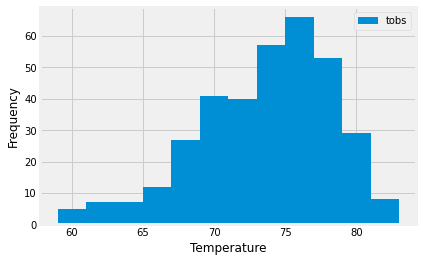

In [47]:
plt.figure();
df_hist=df5.plot.hist(stacked=True, bins=12)
df_hist.set_xlabel("Temperature")
plt.savefig('station-histogram.png')

## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-01', '2017-01-07'))

[(62.0, 68.36585365853658, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-01-01', '2017-01-07'))
print(f'trip start date= 2018-01-01, trip end date=2018-01-07')

[(62.0, 68.36585365853658, 74.0)]
trip start date= 2018-01-01, trip end date=2018-01-07


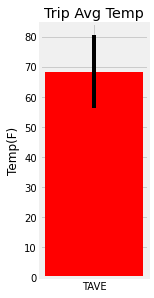

In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plot_temp = ['TAVE']
x_pos = np.arange(len(plot_temp))
plt.figure(figsize=(2.25, 4.25))
plt.bar(plot_temp,68.36585365853658, yerr=12,color='red')
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('temperature.png')
plt.show()


In [60]:
q = session.query(Measurement).join(Station, Measurement.station==Station.station)

In [63]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Perform a query to retrieve the data and precipitation scores in the last one year
results15 = session.query(func.sum(Measurement.prcp),Measurement.date, Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation).join(Station, Measurement.station==Station.station).group_by(Measurement.date).\
filter(Measurement.date>='2017-01-01').\
filter(Measurement.date<='2017-01-07').\
    order_by(func.sum(Measurement.prcp).desc()).all()
results15

[(0.95,
  '2017-01-05',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.7999999999999999,
  '2017-01-06',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.35,
  '2017-01-01',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.18,
  '2017-01-04',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.06,
  '2017-01-07',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.02,
  '2017-01-02',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.0,
  '2017-01-03',
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0)]

In [52]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [53]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_dates=pd.date_range(start='2018-01-01', end='2018-01-07')

# Use the start and end date to create a range of dates
set_dates=pd.date_range(start='2017-01-01', end='2017-01-07')

# Stip off the year and save a list of %m-%d strings
stripped_dates=[date.strftime("%m-%d")for date in set_dates]

# Loop through the list of %m-%d strings and calculate the normals for each date
normals=[daily_normals(date)[0] for date in stripped_dates]
normals


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [54]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index 
df_normals = pd.DataFrame(normals, columns =['Min Temp', 'Average Temp', 'Max Temp'])   
df_normals['Date'] = trip_dates
df_normals

,Min Temp,Average Temp,Max Temp,Date
0,62.0,69.153846,77.0,2018-01-01
1,60.0,69.396226,77.0,2018-01-02
2,62.0,68.909091,77.0,2018-01-03
3,58.0,70.000000,76.0,2018-01-04
4,56.0,67.964286,76.0,2018-01-05
5,61.0,68.964912,76.0,2018-01-06
6,57.0,68.543860,76.0,2018-01-07


In [55]:
# altering the DataFrame 
df_normals = df_normals[['Min Temp', 'Max Temp', 'Average Temp']] 
df_normals['Date'] = trip_dates
df_normals_indexed=df_normals.set_index("Date")
df_normals_indexed

,Min Temp,Max Temp,Average Temp
Date,,,
2018-01-01,62.0,77.0,69.153846
2018-01-02,60.0,77.0,69.396226
2018-01-03,62.0,77.0,68.909091
2018-01-04,58.0,76.0,70.000000
2018-01-05,56.0,76.0,67.964286
2018-01-06,61.0,76.0,68.964912
2018-01-07,57.0,76.0,68.543860


<Figure size 1440x720 with 0 Axes>

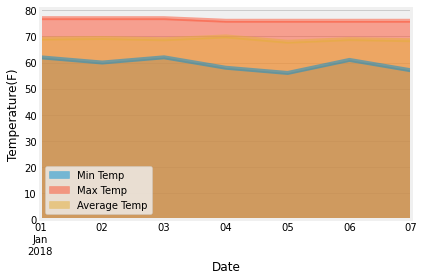

In [56]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize=(20,10))
df_normals_indexed.plot.area(stacked=False)
plt.ylabel('Temperature(F)')
plt.tight_layout()
plt.savefig('daily-normals.png')
plt.show()